In [2]:
%matplotlib inline

import matplotlib.pyplot as plt;
import sympy as sp;

sp.init_printing;

<a name="TOC"></a>

# Table of Contents
***
***
1. [Chapter Summary](#CS)
 1. [Stiffness Matrix for a bar element in Local Coordinates](#CS_stiff)
 1. [Shape Functions](#CS_shape)
 1. [Vector Transformations for a bar in 2D](#CS_trans2d)
 1. [Stiffness Matrix for a bar in 2D](#CS_stiff2d)
 1. [Stress calculations for a bar in 2D](#CS_stress2d)
 1. [Vector Transformations for a bar in 3D](#CS_trans3d)
 1. [Stress calculations for a bar in 3D](#CS_stress3d)
 1. [Inclined/Skewed constraints](#CS_cnstrnt)
 1. [Potential Energy Approach](#CS_pe)
 1. [Galerkin's Residual Method to derive 1D bar element equation](#CS_galerkin)
 1. [Review of other Residual Methods](#CS_residual)
2. [Problems](#Prob)
 1. [3.1](#Prob_31)
 1. [3.13](#Prob_313)
 1. [3.15](#Prob_315)
 1. [3.16](#Prob_316)
 1. [3.20](#Prob_320)
 1. [3.21](#Prob_321)
 1. [3.42](#Prob_342)
 1. [3.49](#Prob_349)
3. [Simulations](#Sim)
  1. [3.20](#Sim_320)
  1. [3.42](#Sim_342)
  1. [3.49](#Sim_349)

<a name="CS"></a>
## Chapter Summary
***

<a name="CS_stiff"></a>
### Stiffness Matrix for a bar element in Local Coordinates

The bar, or truss, is considered to be have a constant cross sectional area $A$, has a length of $L$, and is only capable of resisting axial deflections caused by tensile force $T$ and therefore gives us the ability to approximate tensile stresses $\sigma$; to calculate these fields, the bar will be made of a linear elastic material with a modulus of elasticity $E$ that allows conversions between the tensile stress and strains $\epsilon$. The previous chapters considered idealized springs which resisted axial deflections but did not have stress since there was no cross sectional area to distribute the force over.<br>
To begin, let's define axial stress $\sigma_x$ as the distribution of the tensile force $T$ at a node of the bar element over the bar's cross sectional area $A$.

$$\sigma = \frac{T}{A}$$<br>
Next, we relate the axial strain of the bar $\epsilon_x$ to $\sigma_x$ using Hooke's law and the modulus of elasticity of the bar's material, $E$.

$$\sigma_x = E\epsilon_x$$<br>
The axial strain of the bar is defined by the change in length of the bar element over the original length of the bar element. 

$$\epsilon_x = \frac{du}{dx}$$<br>
We can now combine the above equations and solve for the nodal force to get closer to the format used in the previous chapters.

$$ T = EA\frac{du}{dx}$$<br>
Initial considerations of a bar will only have loads applied at the nodes which yields the property that the change in stress of the bar along it's length is 0.

$$\frac{d}{dx}\biggl(EA\frac{du}{dx}\biggr) = 0$$<br>
Neither the cross sectional area, nor the modulus of elasticity have been taken out of the derivative in preparation for a time when the cross sectional area and/or material property varies along the length of the bar element.
<br><br>
[TOC](#TOC)


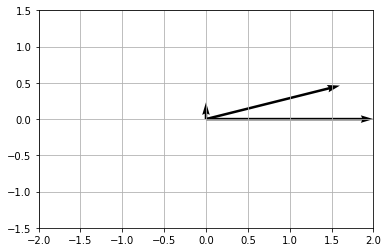

In [39]:
plt.quiver(0,0, 1, 0, scale=2);
plt.quiver(0,0,0,1, scale=20);
plt.quiver(0,0, 0.8, .2, scale=2);
plt.grid()
plt.xlim(-2,2);
plt.ylim(-1.50,1.50);
plt.show()

<a name="CS_shape"></a>
### Shape Functions

The matrix equations allow for the approximation of the field equations at nodes. It is often necessary to approximate one of the field values at a some location that is in/on an element but is in between the end nodes. To do this, we requiquire an interpolation equation that blends the value of a field variable between all pertinent nodes. In the case of the bar element, we need a way of approximating the displacement at any location on the element. To do this, we assume a displacement function for our element as

$$u(x) = a_0 + a_1x$$<br>
In general, the displacement functions has as many constants as the element has Degrees of Freedom (DOF). If our bar element had an intermediate node, then our assumed displacement function would be $u(x) = a_0 + a_1x + a_2x^2$. To determine the values of the constants, we enforce the "boundary conditions" of the bar element that $u(0)=u_0$ and $u(L) = u_1$

$$u(0) = u_0 = a_1$$<br>
$$u(L) = u_1 = u_0 + a_1L \implies a_1 = \frac{u_1-u_0}{L}$$
$$u(x) = u_0 + \frac{u_1-u_0}{L}x$$
$$u(x) = u_0(1-\frac{x}{L}) + u_1(\frac{x}{L})$$
$$u(x) = \begin{bmatrix}1-\frac{x}{L} & \frac{x}{L}\end{bmatrix}\begin{bmatrix}u_0\\u_1\end{bmatrix}$$
$$u(x) = \begin{bmatrix}N_0 & N_1\end{bmatrix}\begin{bmatrix}u_0\\u_1\end{bmatrix}\ \  where\ N_0 = 1-\frac{x}{L}\ \  and\ \  N_1 = \frac{x}{L}$$<br>
$N_0$ and $N_1$ are called shape functions and they contain the following properties:
1. Must be continuous within the bar element
2. Shape functions between two elements which share a node must conform with eachother. This prevents two elements from seperating or overlapping at the node. This property of the shape functions is the reason they are sometimes reffered to as *conforming* or *compatibility* functions. This basic assumption is critical to FEA and allows the information from one element to pass to the next element.
3. Must allow for rigid body motion; consequently, the shape functions of an element must sum to be zero. In the case of the bar element, if $u_0$ and $u_1$ are equal, then $u(x) = 1$

[TOC](#TOC)

<a name="CS_trans2d"></a>
### Vector Transformations for a bar in 2D

For Reasons that will become apparant later, we need a way of jumping between the global coordinate system, which has $\boldsymbol{i}$ and $\boldsymbol{j}$ unit vectors aligned with the global x and y axis, and the local coordinate system, which has $\boldsymbol{i}'$ and $\boldsymbol{j}'$ unit vectors with the $\boldsymbol{i}'$ unit vector aligned with the axis of the bar element and the $\boldsymbol{j}'$ unit vector perpendicular to the axis. In the 2D case, lets assume that the local coordinate system has been rotated by an $\theta$ radians from the global coordinate system. We can then define the local unit vectors as some combination of sines and cosines of the global unit vectors as.

$$ \boldsymbol{i}' = \boldsymbol{i} \cos{\theta} + \boldsymbol{j} \sin{\theta}$$
$$ \boldsymbol{j}' = -\boldsymbol{i} \sin{\theta} + \boldsymbol{j} \cos{\theta}$$<br>
writing in matrix notation we get

$$\begin{bmatrix} \boldsymbol{i}' \\ \boldsymbol{j}' \end{bmatrix} = 
\begin{bmatrix} \cos{\theta} & \sin{\theta} \\ -\sin{\theta} & \cos{\theta} \end{bmatrix}
\begin{bmatrix}\boldsymbol{i} \\ \boldsymbol{j} \end{bmatrix}$$<br>
In shorthand notation we write

$$\begin{bmatrix} \boldsymbol{i}' \\ \boldsymbol{j}' \end{bmatrix} = 
\begin{bmatrix} C & S \\ -S & C \end{bmatrix}
\begin{bmatrix}\boldsymbol{i} \\ \boldsymbol{j} \end{bmatrix}$$<br><br>
where $C = \cos{\theta}$ and $S=\sin{\theta}$. This *transformation*, or *rotation*, *matrix* can be used on transfer any vector quantity from the local coordinate system, or basis, to the global coordinate system or vice-versa. It is left to the reader to investigate the interesting relationship between the inverse and trasnpose of the transformation matrix; this odd but useful property is a result of the rotation matrix being orthogonal.<br>


[TOC](#TOC)

<a name="CS_stiff2d"></a>
### Stiffness matrix for a bar in 2D

In the case of the stiffness matrix, lets analyze a bar element oriented at an angle $\theta$ relative to the global coordinate system. In the local coordinate system, we express the system of equations as

$$ \begin{bmatrix}f_1' \\ f_2' \end{bmatrix} = 
\begin{bmatrix}k & -k \\ -k & k \end{bmatrix}
\begin{bmatrix}u_1' \\ u_2' \end{bmatrix}
\implies
\boldsymbol{f}' = \boldsymbol{k}' \boldsymbol{d}'$$<br>
To determine the transformation matrix, we look at the displacement vectors and see that

$$u_1' = u_1 C + v_1 S$$
$$u_2' = u_2 C + v_2 S$$<br>
yielding the equation

$$\begin{bmatrix} u_1' \\ u_2' \end{bmatrix} = 
\begin {bmatrix} C & S & 0 & 0 \\ 0 & 0 & C & S \end{bmatrix}
\begin{bmatrix}u_1 \\ v_1 \\ u_2 \\ v_2 \end{bmatrix}$$<br>
or more conciseley

$$ \boldsymbol{d}' = \boldsymbol{T}^* \boldsymbol{d}$$<br>
The * is used to indicate that the transformation is incomplete/incorrect for reasons that will be apparent later. This equation can be substituted into the system of equations for the local coordinate system and yields

$$ \boldsymbol{f}' = \boldsymbol{k}' \boldsymbol{T}^* \boldsymbol{d}$$<br>
similarly 

$$\begin{bmatrix}f_1' \\ f_2' \end{bmatrix} = 
\boldsymbol{T}^*
\begin{bmatrix}f_{1x} \\ f_{1y} \\ f_{2x} \\ f_{2y} \end{bmatrix} 
\implies
\boldsymbol{f}' = \boldsymbol{T}^* \boldsymbol{f}
$$<br>
which can also be substituted into the previous equation yielding

$$\boldsymbol{T}^* \boldsymbol{f} = \boldsymbol{k}' \boldsymbol{T}^* \boldsymbol{d}$$<br>
Though this system of equations is technically true, it yields an immediate issue if one tries to solve for $\boldsymbol{d}$ as has been done in previous sections; the transformation matrix $\boldsymbol{T}^*$ is not square and is therefore non-invertible. To rectify this, the entire system of equation must be expanded to include $v_1'$, $v_2'$, $f_1'$, and $f_2'$ in the original system of equations even though they must all come to be 0. This activity is left to the reader, for which they should reference the derivation in the "Vector Transformation for a bar in 2D" section. We find the correct transformation matrix to be

$$ \boldsymbol{T} = 
\begin{bmatrix}C & S & 0 & 0 \\ -S & C & 0 & 0 \\ 0 & 0 & C & S \\ 0 & 0 & -S & C \end{bmatrix}$$<br>
which gives the displacement transformation of

$$ \begin{bmatrix}u_1' \\ v_1' \\ u_2' \\ v_2' \end{bmatrix} = 
\boldsymbol{T}
\begin{bmatrix} u_1 \\ v_1 \\ u_2 \\ v_2 \end{bmatrix}$$<br>

$$ \begin{bmatrix}f_1' \\ f_1' \\ f_2' \\ f_2' \end{bmatrix} = 
\boldsymbol{T}
\begin{bmatrix} f_{1x} \\ f_{1y} \\ f_{2x} \\ f_{2y} \end{bmatrix}$$<br>

Therefore
$$ \boldsymbol{T} \boldsymbol{f} = \boldsymbol{k}' \boldsymbol{T} \boldsymbol{d}$$<br>
$$ \boldsymbol{f} = \boldsymbol{T}^{-1}\boldsymbol{k}' \boldsymbol{T} \boldsymbol{d}$$<br>
$$ \therefore \boldsymbol{f} = \boldsymbol{k}\boldsymbol{d}\ \ where\ \ \boldsymbol{k} = \boldsymbol{T}^T\boldsymbol{k}\boldsymbol{T}$$<br>
[TOC](#TOC)

<a name="CS_stress2d"></a>
### Stress Calculations for a bar in 2D

[TOC](#TOC)

<a name="CS_trans3d"></a>
### Vector Transformations for a bar in 3D

[TOC](#TOC)

<a name="CS_stress3d"></a>
### Stress Calculations for a bar in 3D

[TOC](#TOC)

<a name="CS_cnstrnt"></a>
### Inclined/Skewed Constraints

[TOC](#TOC)

<a name="CS_pe"></a>
### Potential Energy Approach

[TOC](#TOC)

<a name="CS_galerkin"></a>
### Galerkin's Residual Method to derive 1D bar element equation

[TOC](#TOC)

<a name="CS_residual"></a>
### Review of other Residual Methods

[TOC](#TOC)

<a name="Prob"></a>

## Problems
***

<a name="Prob_31"></a>
### Problem 3.1

[TOC](#TOC)

<a name="Prob_313"></a>
### Problem 3.13

[TOC](#TOC)

<a name="Prob_315"></a>
### Problem 3.15

[TOC](#TOC)

<a name="Prob_316"></a>
### Problem 3.16

[TOC](#TOC)

<a name="Prob_320"></a>
### Problem 3.20

[TOC](#TOC)

<a name="Prob_321"></a>
### Problem 3.21

[TOC](#TOC)

<a name="Prob_342"></a>
### Problem 3.42

[TOC](#TOC)

<a name="Prob_349"></a>
### Problem 3.49

[TOC](#TOC)

<a name="Sim"></a>
## Simulations
***

<a name="Sim_320"></a>
### Simulation of problem 3.20

[TOC](#TOC)

<a name="Sim_342"></a>
### Simulation of problem 3.42

[TOC](#TOC)

<a name="Sim_349"></a>
### Simulation of problem 3.49

[TOC](#TOC)